In [1]:
# импортируем необходимые библиотеки и классы
import numpy as np
import pandas as pd
from sklearn.preprocessing import (StandardScaler, 
                                   MinMaxScaler, 
                                   RobustScaler)
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns

In [2]:
# загружаем набор данных
train = pd.read_csv('Data/Normality.csv', sep=';')

Скос 6.7435491347775
Эксцесс 88.52885252034434
Минимальное значение 0.0
Максимальное значение 140000.0
Среднее значение 3350.7137969219248
Стандартное отклонение 5080.739926908223


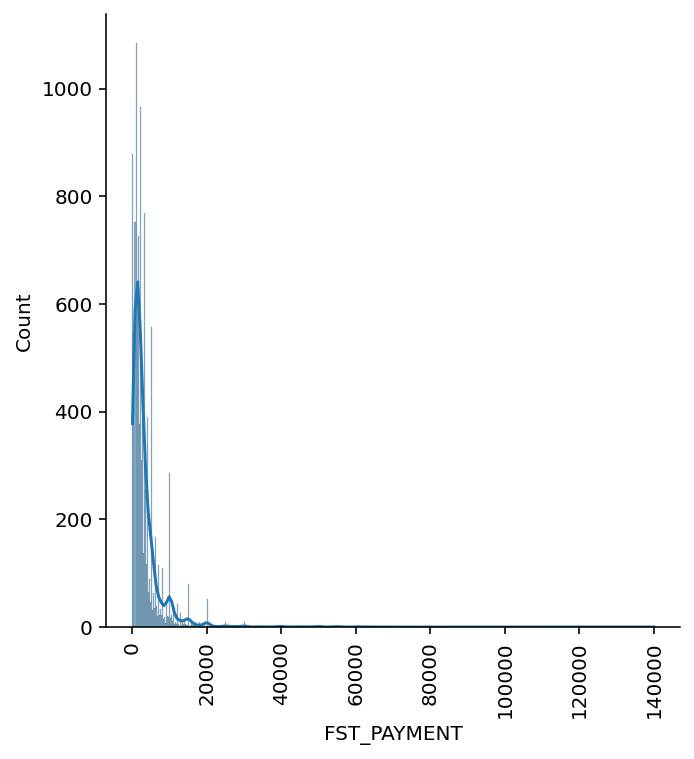

In [3]:
# вычисляем скос, эксцесс, минимум, максимум, 
# среднее, стандартное отклонение
print("Скос", train['FST_PAYMENT'].skew())
print("Эксцесс", train['FST_PAYMENT'].kurtosis())
print("Минимальное значение", train['FST_PAYMENT'].min())
print("Максимальное значение", train['FST_PAYMENT'].max())
print("Среднее значение", train['FST_PAYMENT'].mean())
print("Стандартное отклонение", train['FST_PAYMENT'].std())

# строим гистограмму распределения
sns.displot(data=train, x='FST_PAYMENT', kde=True)
plt.xticks(rotation=90)

plt.show()

In [4]:
# создаем экземпляр класса StandardScaler
standardscaler = StandardScaler()
# обучаем и применяем модель стандартизации
train['FST_PAYMENT_standardscaled'] = standardscaler.fit_transform(
    train[['FST_PAYMENT']])

In [5]:
# создаем экземпляр класса MinMaxScaler
minmaxscaler = MinMaxScaler()
# обучаем и применяем модель стандартизации
train['FST_PAYMENT_minmaxscaled'] = minmaxscaler.fit_transform(
    train[['FST_PAYMENT']])

In [6]:
# создаем экземпляр класса RobustScaler
robustscaler = RobustScaler()
# обучаем и применяем модель стандартизации
train['FST_PAYMENT_robustscaled'] = robustscaler.fit_transform(
    train[['FST_PAYMENT']])

FST_PAYMENT_standardscaled
Скос 6.7435491347775
Эксцесс 88.52885252034432
Минимальное значение -0.6595242185440513
Максимальное значение 26.896810399168672
Среднее значение 9.524471895606669e-17
Стандартное отклонение 1.0000469252246733



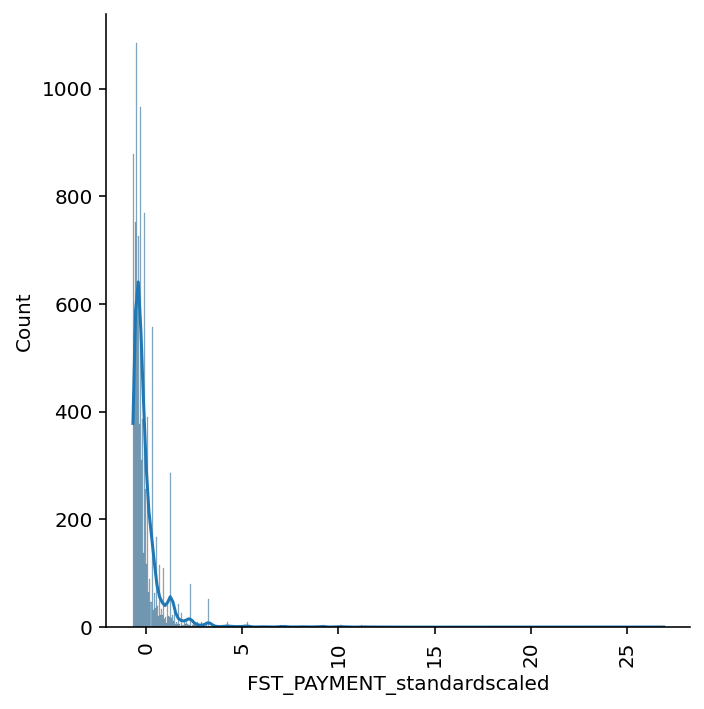

FST_PAYMENT_minmaxscaled
Скос 6.7435491347775
Эксцесс 88.52885252034437
Минимальное значение 0.0
Максимальное значение 1.0
Среднее значение 0.023933669978013664
Стандартное отклонение 0.036290999477916204



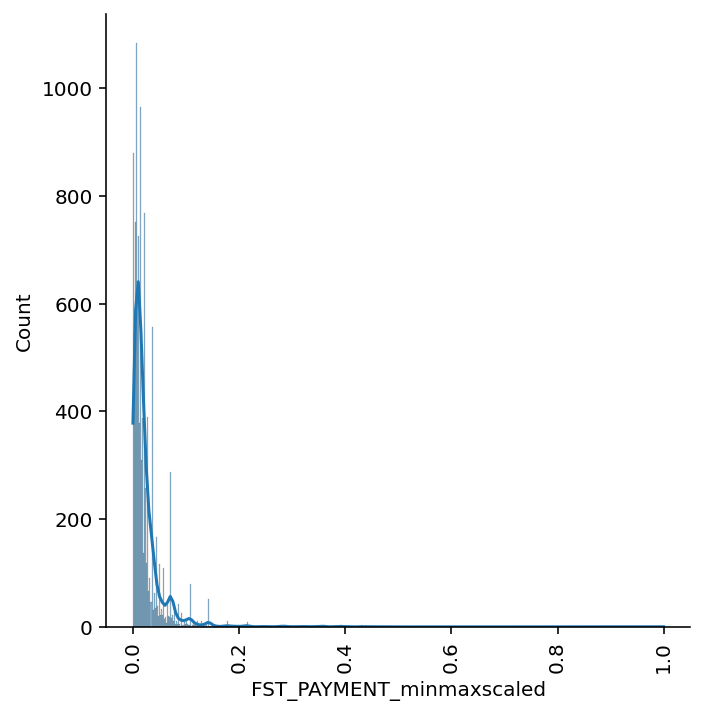

FST_PAYMENT_robustscaled
Скос 6.7435491347775
Эксцесс 88.52885252034432
Минимальное значение -0.6666666666666666
Максимальное значение 46.0
Среднее значение 0.45023793230730763
Стандартное отклонение 1.6935799756360734



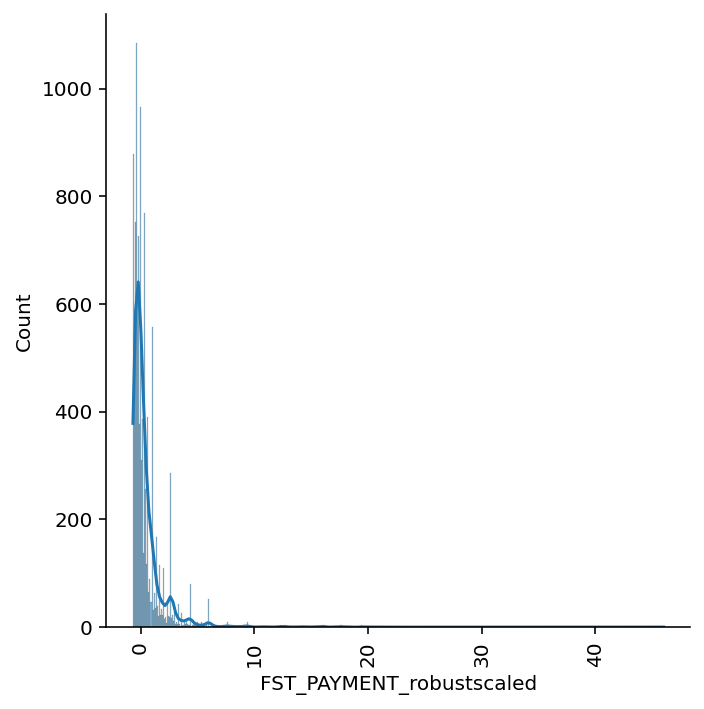

In [7]:
# записываем наши переменные в список
num_cols = train.columns[train.columns.str.contains('scaled')]
# по каждой переменной в списке вычисляем скос, эксцесс, 
# минимум, максимум, среднее, стандартное отклонение,
# строим гистограмму распределения и график квантиль-квантиль
for col in num_cols:
    print(col)
    print("Скос", train[col].skew())
    print("Эксцесс", train[col].kurtosis())
    print("Минимальное значение", train[col].min())
    print("Максимальное значение", train[col].max())
    print("Среднее значение", train[col].mean())
    print("Стандартное отклонение", train[col].std())
    print("")
    
    # строим гистограмму распределения
    sns.displot(data=train, x=col, kde=True)
    plt.xticks(rotation=90)

    plt.show()

In [8]:
# заменяем значения в первых 3 наблюдениях
# переменной FST_PAYMENT на аномально большие
train.iloc[0, 3] = 9999999
train.iloc[1, 3] = 9999999
train.iloc[2, 3] = 9999999

In [9]:
# смотрим результат
train['FST_PAYMENT'].head()

0    9999999.0
1    9999999.0
2    9999999.0
3        790.0
4       1112.0
Name: FST_PAYMENT, dtype: float64

In [10]:
# обучаем и применяем модель стандартизации
train['FST_PAYMENT_robustscaled'] = robustscaler.fit_transform(
    train[['FST_PAYMENT']])
# взглянем на результат
train['FST_PAYMENT_robustscaled'].head()

0    3332.666333
1    3332.666333
2    3332.666333
3      -0.403333
4      -0.296000
Name: FST_PAYMENT_robustscaled, dtype: float64